Importint The  Necessary Library

In [1]:
%pip install numpy

In [2]:
%pip install pandas

In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
url = 'StockDataHDFCBANK.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2023-04-03T09:15:00+0530,1607.55,1609.55,1606.00,1606.65,169821
1,1,2023-04-03T09:20:00+0530,1606.55,1607.95,1603.40,1607.25,203608
2,2,2023-04-03T09:25:00+0530,1607.45,1607.65,1604.10,1607.00,164006
3,3,2023-04-03T09:30:00+0530,1607.00,1610.15,1606.70,1609.10,226137
4,4,2023-04-03T09:35:00+0530,1609.40,1610.40,1607.65,1608.25,138182


Data Preprocessing

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2023-04-03 09:15:00+05:30,0,1607.55,1609.55,1606.00,1606.65,169821
2023-04-03 09:20:00+05:30,1,1606.55,1607.95,1603.40,1607.25,203608
2023-04-03 09:25:00+05:30,2,1607.45,1607.65,1604.10,1607.00,164006
2023-04-03 09:30:00+05:30,3,1607.00,1610.15,1606.70,1609.10,226137
2023-04-03 09:35:00+05:30,4,1609.40,1610.40,1607.65,1608.25,138182


Data Visualization

In [7]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


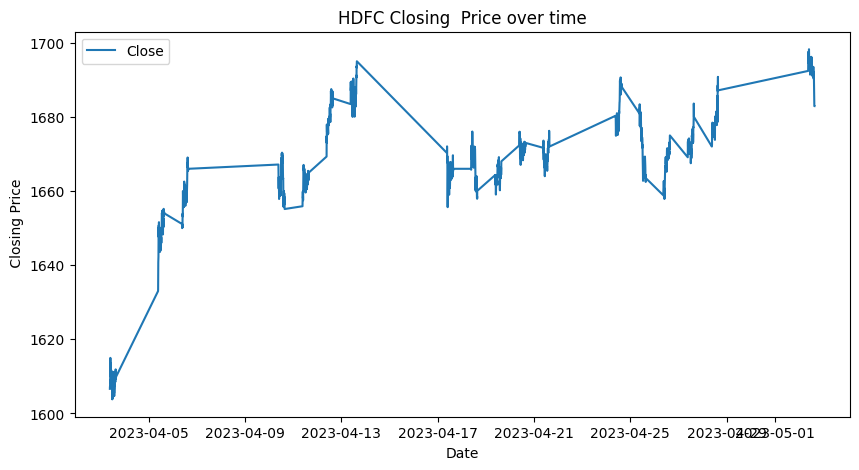

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Close'],label='Close')
plt.title('HDFC Closing  Price over time')
plt.xlabel('Date')
plt.ylabel(' Closing Price')
plt.legend()
plt.show()

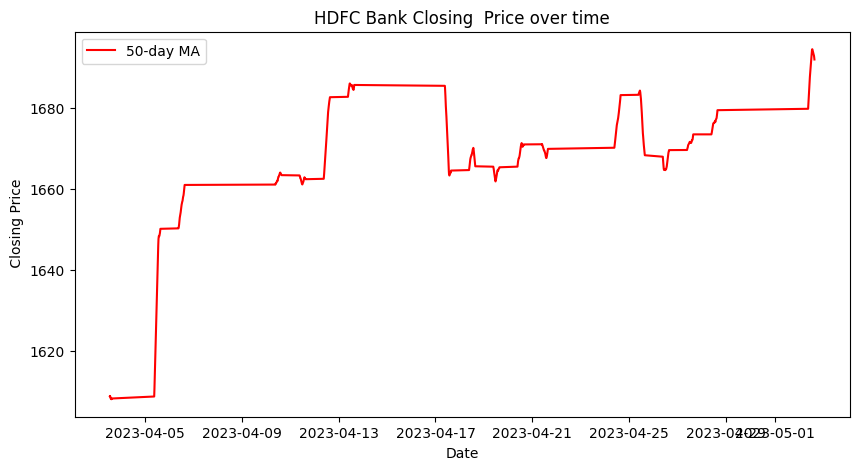

In [9]:
# calculate the 50-day  simple moving averages
df['50ma'] = df['Close'].rolling(window=50).mean()
df['200ma'] = df['Close'].rolling(window=200).mean()

# plot 50-day moving average
plt.figure(figsize=(10,5))
plt.plot(df.index,df['50ma'],label='50-day MA',color='red')
plt.title('HDFC Bank Closing  Price over time')
plt.xlabel('Date')
plt.ylabel(' Closing Price')
plt.legend()
plt.show()

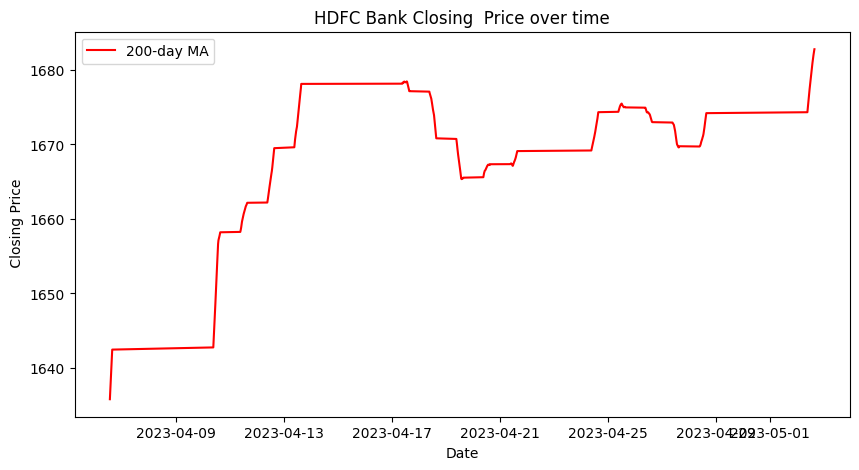

In [10]:
# plot 200-day moving average
plt.figure(figsize=(10,5))
plt.plot(df.index,df['200ma'],label='200-day MA',color='red')
plt.title('HDFC Bank Closing  Price over time')
plt.xlabel('Date')
plt.ylabel(' Closing Price')
plt.legend()
plt.show()

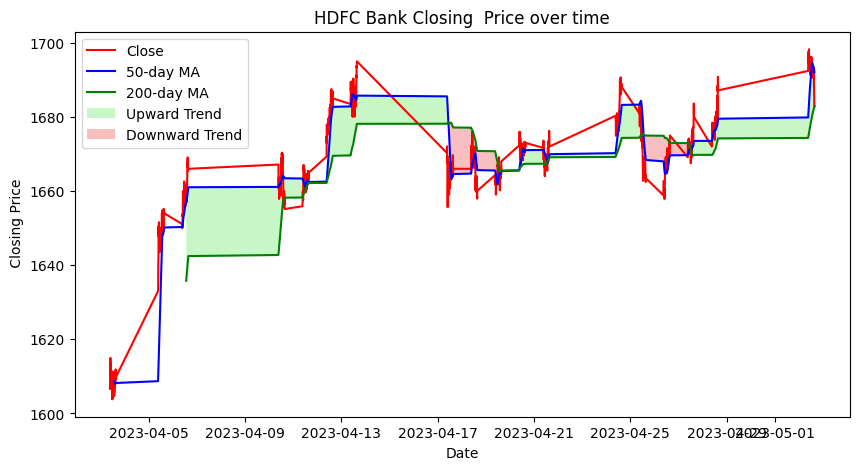

In [11]:
#plot closing price with 50-day and 200-day moving averages
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Close'],label='Close',color='red')
plt.plot(df.index,df['50ma'],label='50-day MA',color='blue')
plt.plot(df.index,df['200ma'],label='200-day MA',color='green')

#shading the upwad trend (when 50ma>200ma)
plt.fill_between(df.index,df['50ma'],df['200ma'],where=df['50ma']>df['200ma'],facecolor='lightgreen',alpha=0.5,label='Upward Trend')

#shading the downward trend (when 50ma<200ma)
plt.fill_between(df.index,df['50ma'],df['200ma'],where=df['50ma']<df['200ma'],facecolor='lightcoral',alpha=0.5,label='Downward Trend')

plt.title('HDFC Bank Closing  Price over time')
plt.xlabel('Date')
plt.ylabel(' Closing Price')
plt.legend()
plt.show()